# Assignment 1.

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdataanalysis2020/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 2nd, 2020 at 23:55. Hand in your files via [`http://peergrade.io`](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. Thus, the peer evaluations are due on Monday March 9th, 2020 at 23:55.

## Part 1: Temporal Patterns

We look only at the focus-crimes in the exercise below

In [6]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

*Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year). In this exercise, please generate the visualizations described below. 

* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
* *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
* *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [59]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

Then we create a column of the dataframe as a datetime object, so it's easier to work with in the following exercises.

In [62]:
df['Date_dt']=pd.to_datetime(df.Date, format='%m/%d/%Y', errors='coerce')

We do not take into account the year 2018 since the data is not complete for that year, which can lead to some distortion of the visualization given that we have more points at a ceretain period of the year.

In [63]:
df['Year'] = df['Date_dt'].map(lambda x: x.year)
df=df[df.Year<2018]

#### Weekly patterns
first we analyze the weekly patterns on the data by making bar plots of the quantity of a given forcus crime over each day of the week. Notice that we define a fuinction to avoid rewritting the same piece of code over and over.

<Figure size 2160x3600 with 0 Axes>

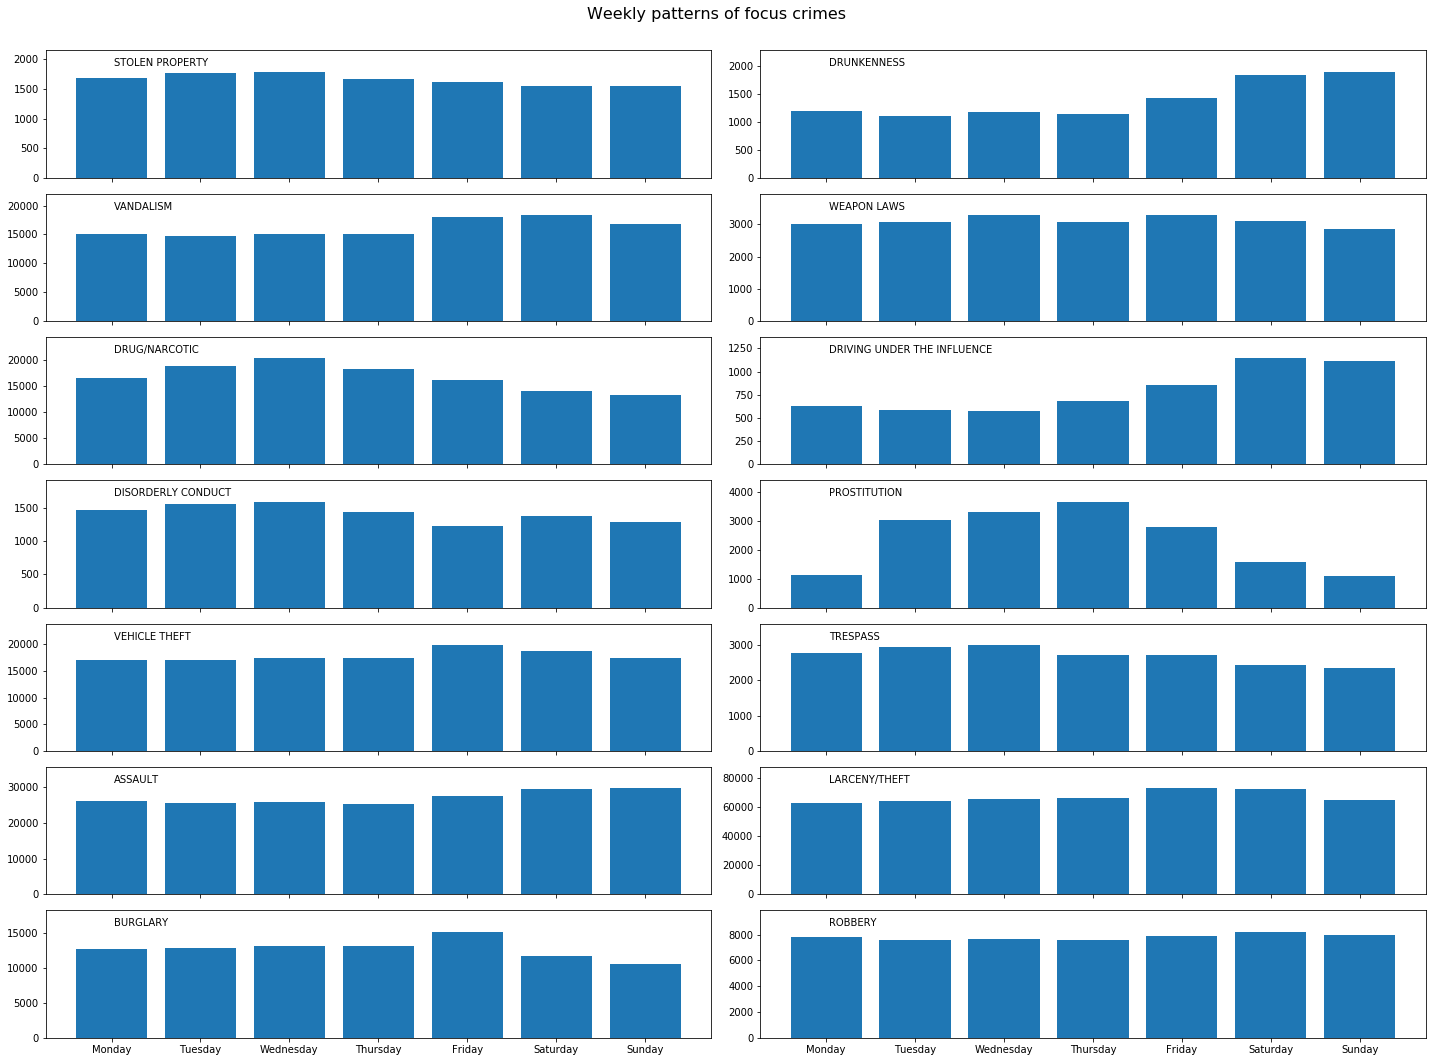

In [56]:

df_weekly=df[df.Category.isin(focuscrimes)].groupby(['DayOfWeek','Category'])['IncidntNum'].count()
df_weekly=df_weekly.reindex(list(calendar.day_name ), level='DayOfWeek')
#function to plot the focus crimes over different period of times.

def barplots(df,focuscrimes, title):
    a=0
    plt.figure(figsize=(30, 50))
    fig, ax = plt.subplots(nrows=7, ncols=2, sharex=True,figsize=(20,15))
    for i in focuscrimes:
        b=a%7
        c=a%2
        ax[b,c].bar(df[:,i].index ,df[:,i])
        ax[b,c].text(0.03,df[:,i].max()*1.05,i)
        ax[b,c].set_ylim(0,df[:,i].max()*1.2)
        a+=1
    plt.suptitle(title, fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.94)
    plt.show()

barplots(df_weekly, focuscrimes, 'Weekly patterns of focus crimes')

#### The months

<Figure size 2160x3600 with 0 Axes>

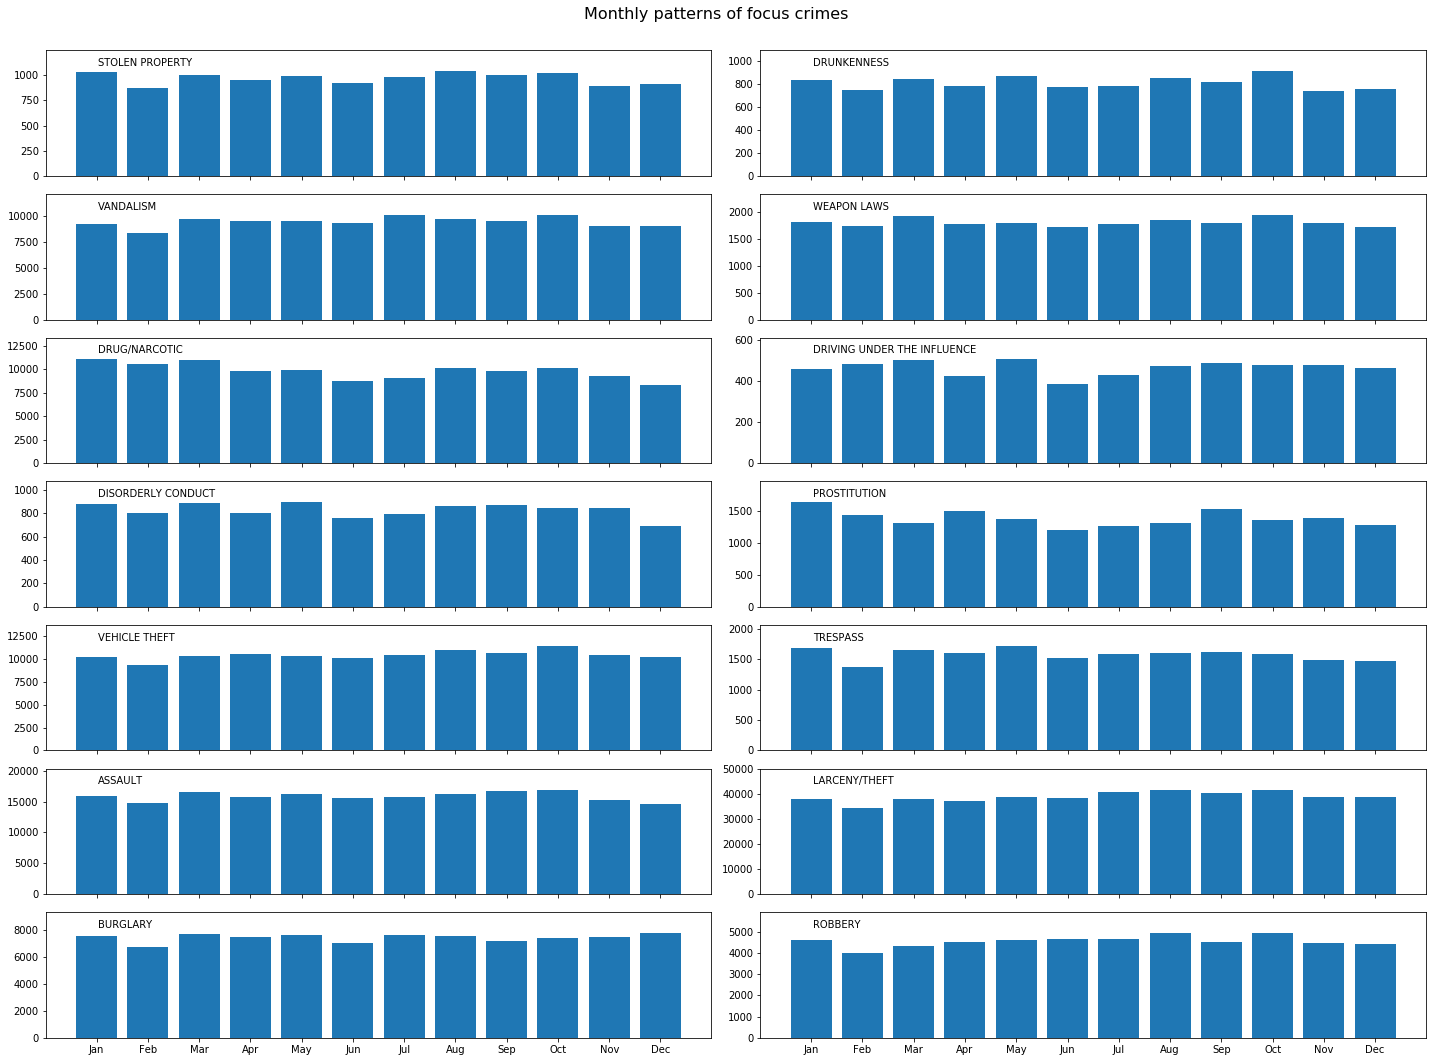

In [57]:
df['Month'] = df['Date_dt'].map(lambda x: calendar.month_abbr[x.month])
df_monthly=df[df.Category.isin(focuscrimes)].groupby(['Month','Category'])['IncidntNum'].count()
df_monthly=df_monthly.reindex(list(calendar.month_abbr ), level='Month')

barplots(df_monthly, focuscrimes, 'Monthly patterns of focus crimes')


<Figure size 2160x3600 with 0 Axes>

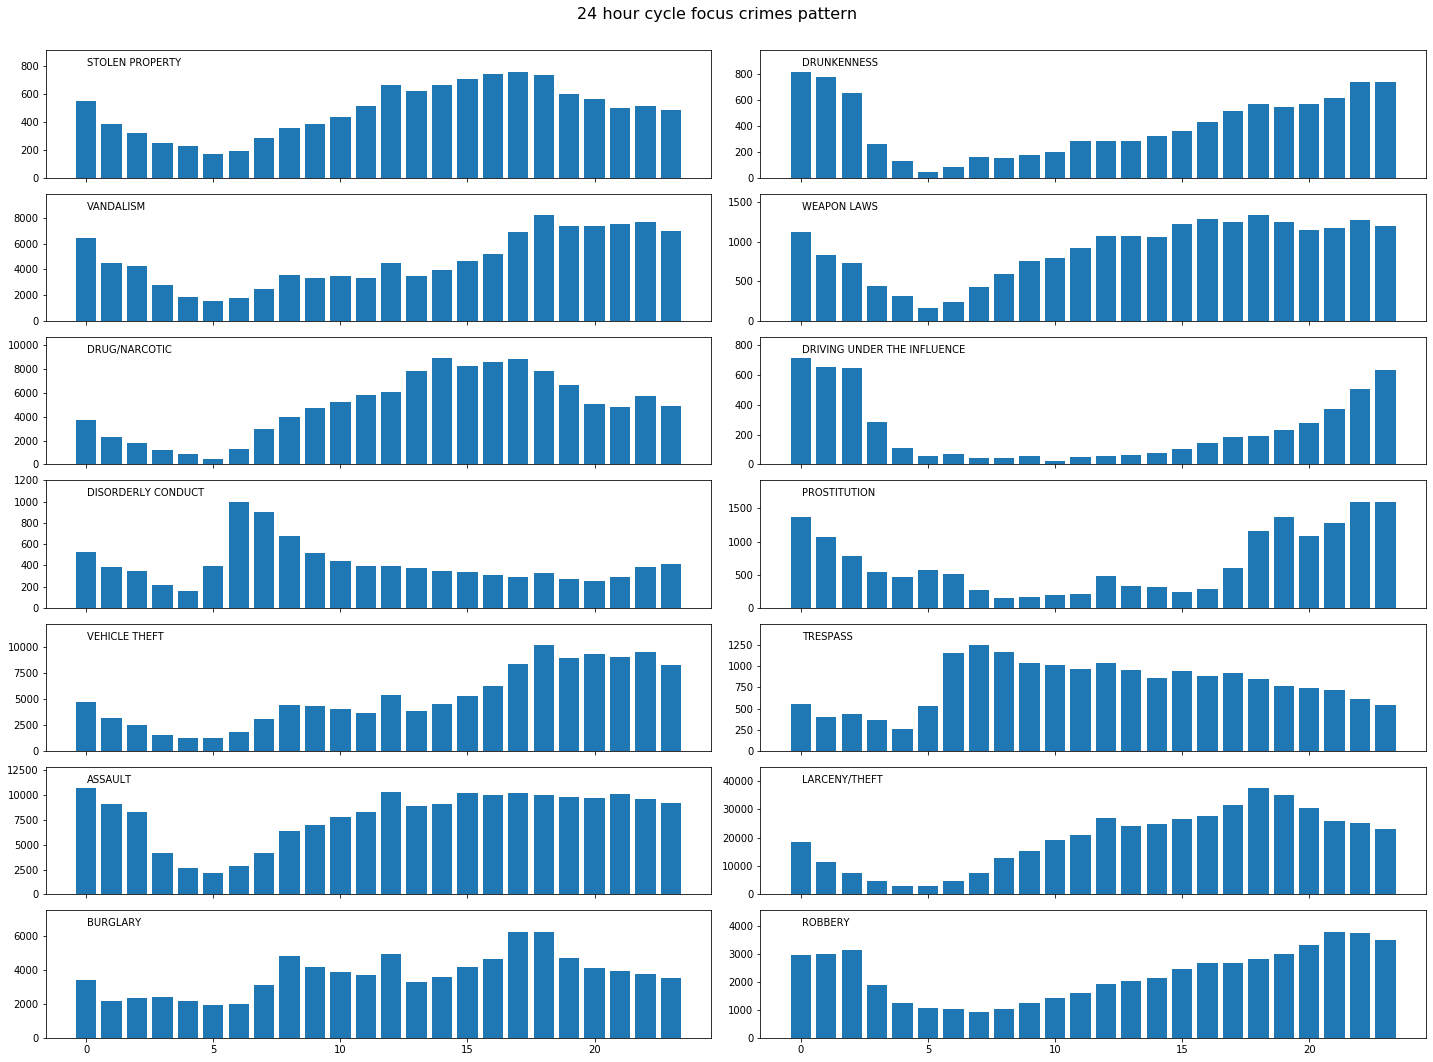

In [64]:
df['Time'] = [x + ':00' for x in df['Time']]
df['TimeInt']=pd.to_timedelta(df.Time, unit='hours').dt.floor('H')
df['HourInt']=  df['TimeInt']/ np.timedelta64(1, 'h')
df_24h=df[df.Category.isin(focuscrimes)].groupby(['HourInt','Category'])['Category'].count()

barplots(df_24h, focuscrimes, '24 hour cycle focus crimes pattern')

<Figure size 2160x3600 with 0 Axes>

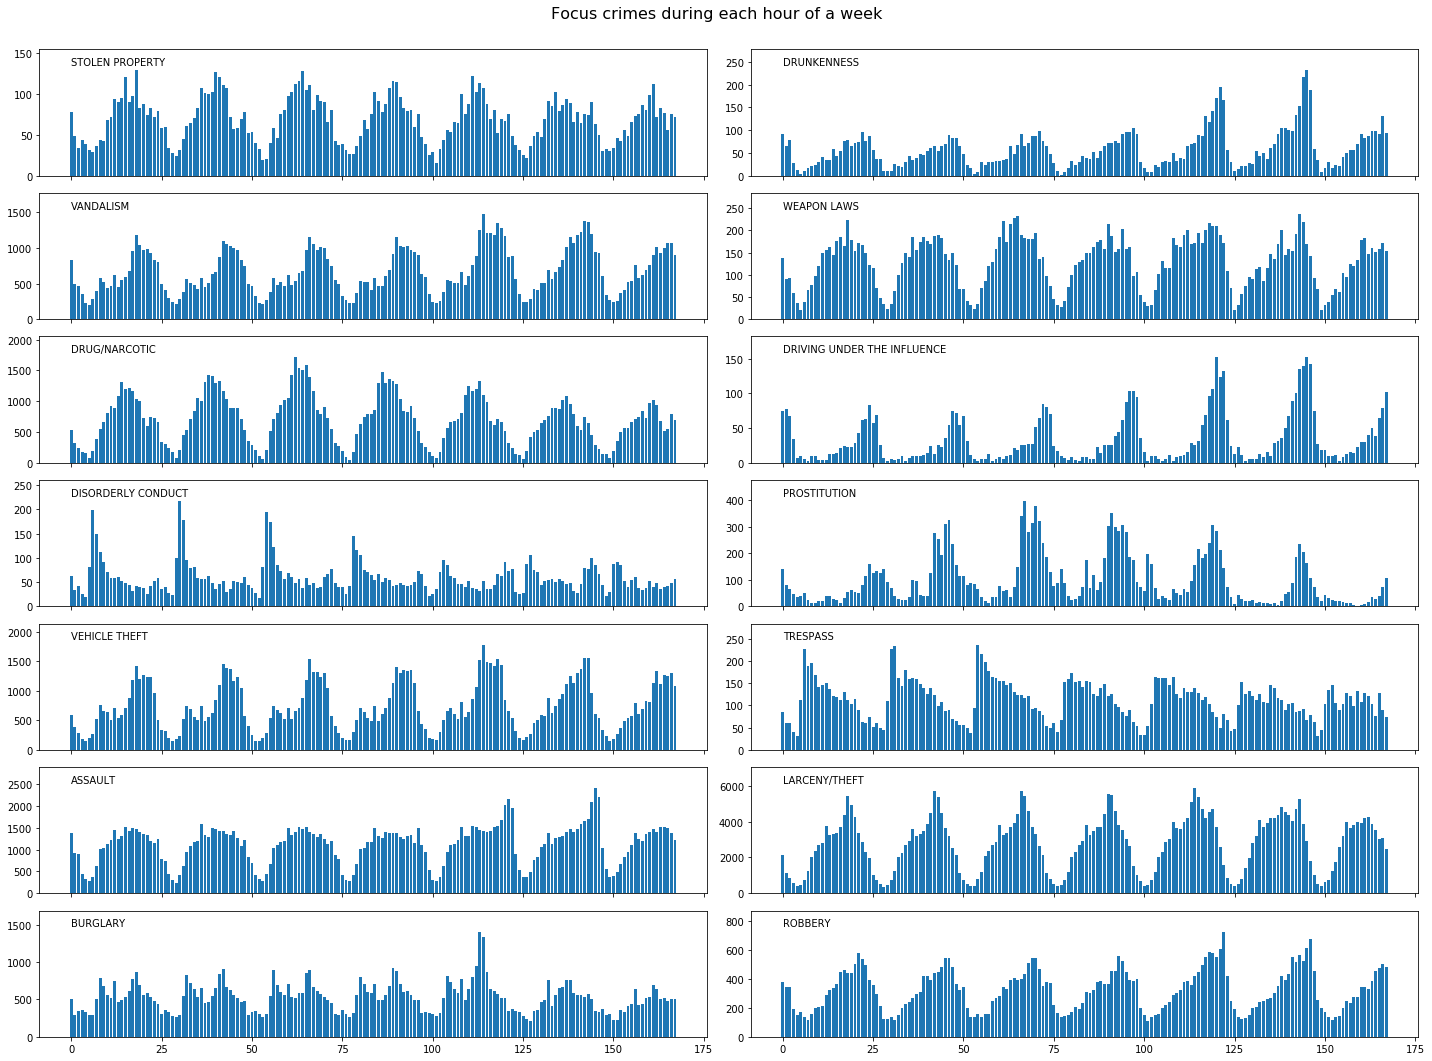

In [65]:
days = dict(zip(calendar.day_name, range(7))); 
df['Day_nr'] = df['DayOfWeek'].map(lambda x: days[x])
df['Interval168']=df['Day_nr']*24+df['HourInt']
df_timeint168=df[df.Category.isin(focuscrimes)].groupby(['Interval168','Category'])['Category'].count()
barplots(df_timeint168,focuscrimes,'Focus crimes during each hour of the 168h of a week')

## Part 2: Thinking about data and visualization

*Excercise:* Questions for the [first video lecture](https://www.youtube.com/watch?v=9D2aI30AMhM).
* What is the difference between *data* and *metadata*? How does that relate to the bike-example?
* Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
* Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
* In your own words, explain the difference between *exploratory* and *explanatory* data analysis. 


*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
* What is the difference between a bar-chart and a histogram?
* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

## Part 3: Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 
* Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).
* Finally, grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can bee misleading? 

## Part 5: Heatmaps of geo-data

*Exercise*: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials). 

Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

* First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude.
* Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).
![example](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/city_hall_2020.png)
* Now, let's plot some more data (no need for popups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. 
We can call this a kind of visualization a *point scatter plot*.

------

* Next, let's play with **heatmaps**. You can figure out the appropriate commands by grabbing code from the main [tutorial](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data)) and modifying to suit your needs.
   * To create your first heatmap, grab all arrests for the category `'SEX OFFENSES, NON FORCIBLE'` across all time. Play with parameters to get plots you like.
   * Now, comment on the differences between scatter plots and heatmaps. 
      - What can you see using the scatter-plots that you can't see using the heatmaps? 
      - And *vice versa*: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?
   * Play around with the various parameter for heatmaps. You can find a list here: https://python-visualization.github.io/folium/plugins.html
   * Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the `radius` and `max_zoom`).
For one combination of settings, my heatmap plot looks like this.
![maps](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png)
   * In that screenshot, I've (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words. 

*Exercise*: Heat map movies. This exercise is a bit more independent than above - you get to make all the choices.

* Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).
* Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.
* Create the movie using `HeatMapWithTime`.
* Comment on your results: 
  - What patterns does your movie reveal?
  - Motivate/explain the reasoning behind your choice of crimetype and time-resolution. 

## Part 6: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the hourly activity for `PROSTITUTION` something surprising is going on on Wednesday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
1. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
1. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png).

*Exercise*: Data errors. The data errors we discovered above become invisible when we aggregate data. When we calculate mean values, statistics more generally. And when we visualize, they become difficult to notice when when we bin the data. We explore this process in the exercise below.

This last exercise has two parts.
* In each of the three examples above, describe in your own words how could the data-errors I call attention to above can biased the binned versions of the data and also briefly mention how it could create errors in how we understand what's going on in San Francisco and our modeling.
* (Optional) Find your own example of human noise in the data and visualize it.